In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns

from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [73]:
iris = sns.load_dataset('iris')
iris.dtypes
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


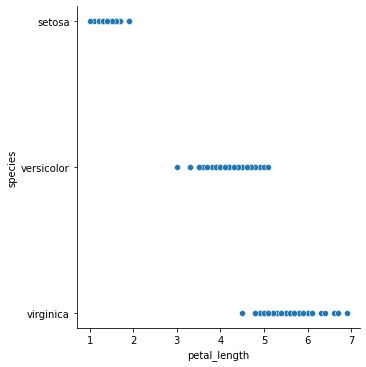

In [8]:
sns.relplot(x='petal_length', y='species', data=iris)

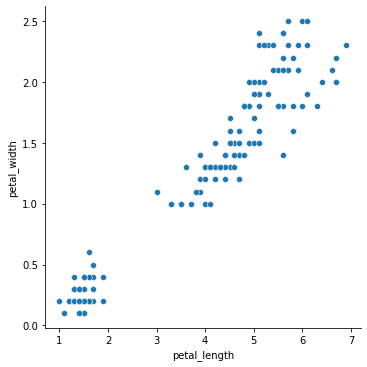

In [10]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
#Yes there is a positive correlation between petal width and petal length

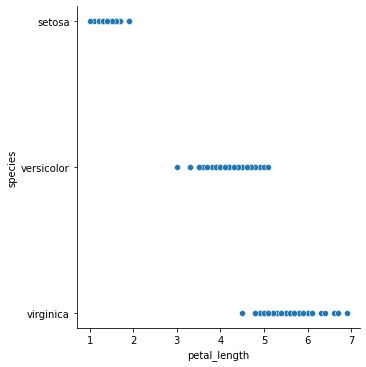

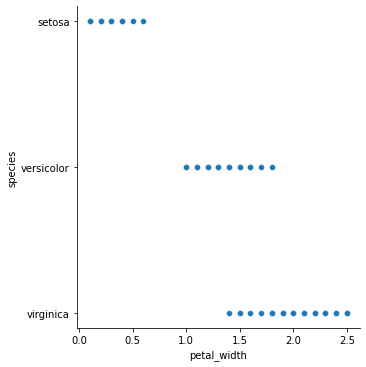

In [11]:
sns.relplot(x='petal_length', y='species', data=iris)
sns.relplot(x='petal_width', y='species', data=iris)
#Yes it would be reasonable to predict species based on petal width and petal length

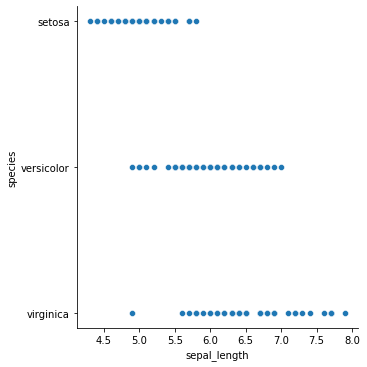

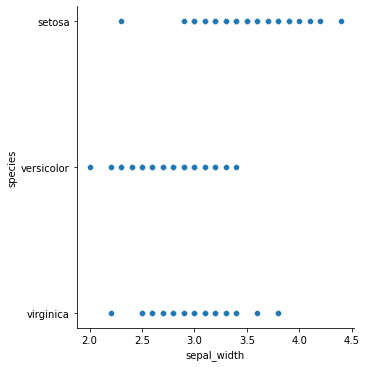

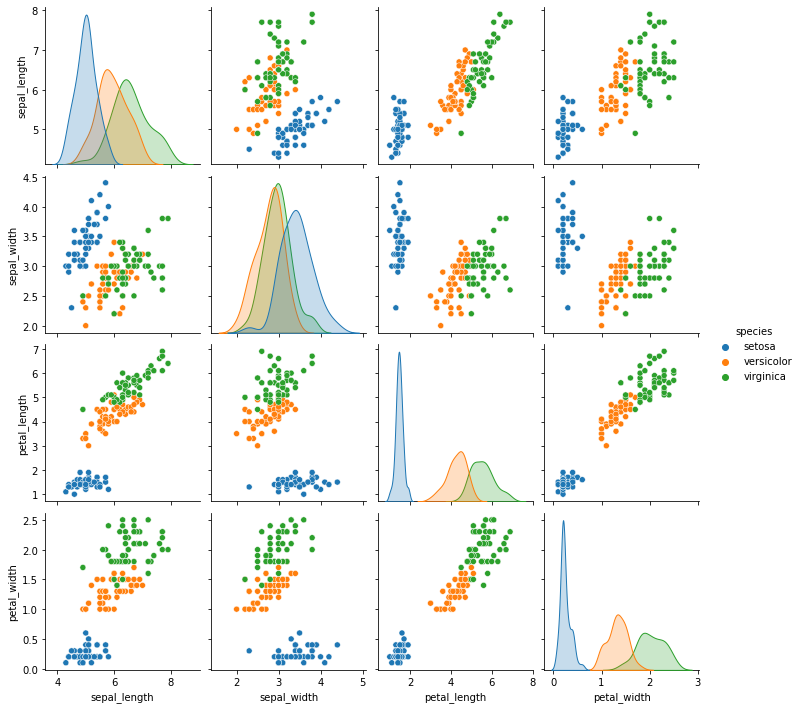

In [74]:
sns.relplot(x='sepal_length', y='species', data=iris)
sns.relplot(x='sepal_width', y='species', data=iris)
sns.pairplot(iris, hue="species")
#Petal width, petal length are correlated with species. Sepal length, and sepal width are not correlated with species.

In [32]:
anscombe = sns.load_dataset('anscombe')
anscombe.groupby(['dataset']).agg(['max', 'min', 'median', 'mean'])

x                       y                       
          max  min median mean    max   min median      mean
dataset                                                     
I        14.0  4.0    9.0  9.0  10.84  4.26   7.58  7.500909
II       14.0  4.0    9.0  9.0   9.26  3.10   8.14  7.500909
III      14.0  4.0    9.0  9.0  12.74  5.39   7.11  7.500000
IV       19.0  8.0    8.0  9.0  12.50  5.25   7.04  7.500909

Text(0.5, 1.0, 'Providing an x and y value groups the data')

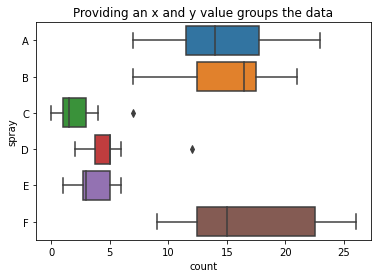

In [26]:
InsectSprays = data('InsectSprays')
InsectSprays.head()

sns.boxplot(data=InsectSprays, y='spray', x='count')
plt.title('Providing an x and y value groups the data')

In [52]:
swiss = data('swiss')
swiss.head()


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [53]:
def find_catholic(number):
    if number > 50:
        return True
    else:
        return False



In [56]:

mask = swiss.Catholic.apply(find_catholic)

swiss['is_catholic'] = mask
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


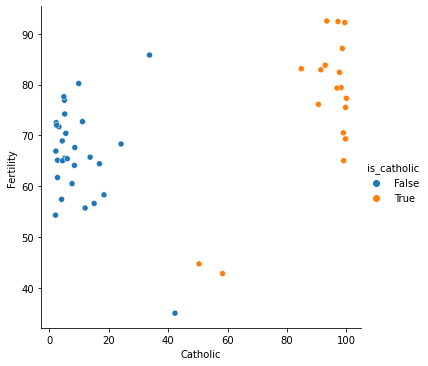

In [61]:
sns.relplot(x='Catholic', y='Fertility', hue = 'is_catholic', data=swiss)
##Yes it appears Catholic regions are more fertile than non-Catholic regions 

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


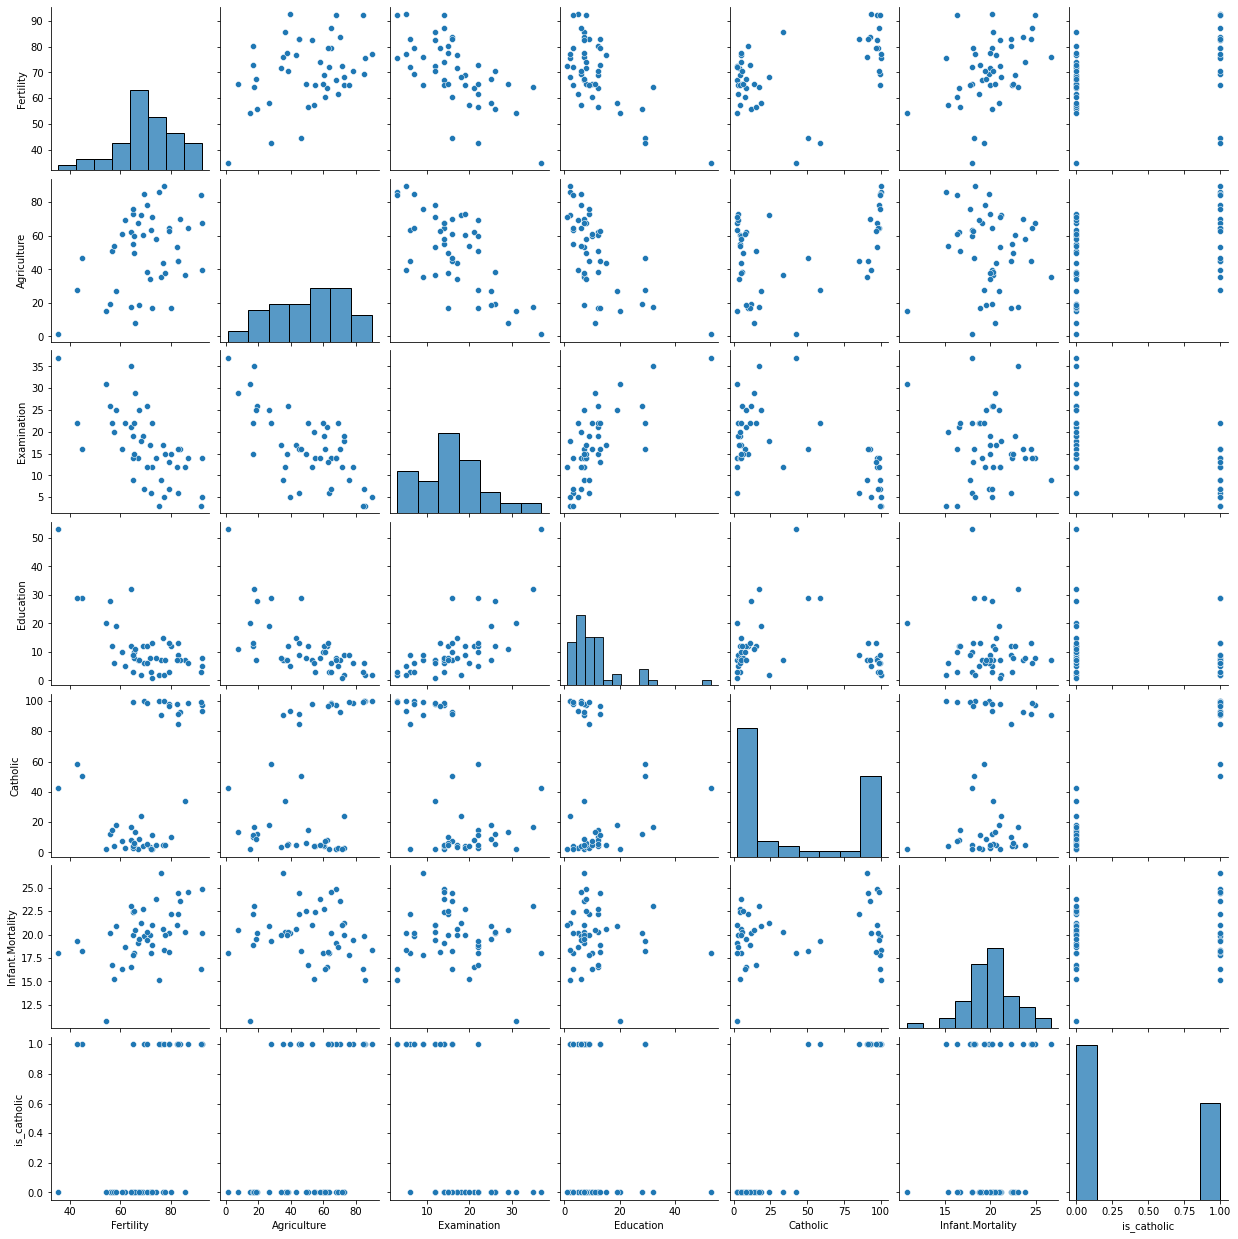

In [66]:
sns.pairplot(swiss)
##Examination and education are the biggest predictors of fertility. They are negatively correlated with fertility.

<AxesSubplot:xlabel='Fertility', ylabel='Catholic'>

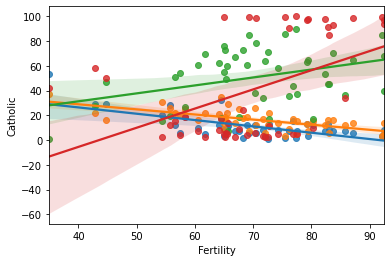

In [83]:
sns.regplot(x = 'Fertility', y ='Education', data= swiss)
sns.regplot(x = 'Fertility', y ='Examination', data= swiss)
sns.regplot(x = 'Fertility', y ='Agriculture', data= swiss)
sns.regplot(x = 'Fertility', y ='Catholic', data= swiss)
##Agriculture is most positively correlated with Fertility, but Education is most negatively associated with Fertility. 

In [126]:
chipotle = get_db_url(host, user, password, "chipotle")
sql_chipotle = '''
SELECT *
FROM orders
'''




In [129]:
chipotle = pd.read_sql(sql_chipotle, chipotle)

chipotle["item_price"] = chipotle["item_price"].str.lstrip("$")
chipotle = chipotle.astype({"item_price":"float64"})
top_four = chipotle.groupby("item_name").sum().sort_values(by=["quantity"], ascending = False).head(4)
top_four = top_four.reset_index()

AttributeError: 'DataFrame' object has no attribute 'cursor'

<AxesSubplot:ylabel='Count'>

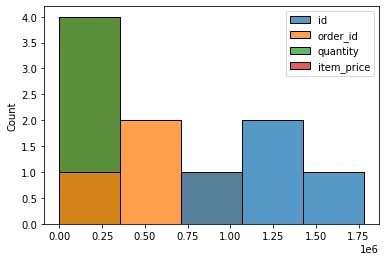

In [123]:
sns.histplot(top_four)